<a href="https://colab.research.google.com/github/KAVINKDK4/customer-churn/blob/main/Customer_churn_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas numpy


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (after you’ve uploaded it)
df = pd.read_csv('customer_churn.csv').dropna()


In [ ]:
# Convert categorical variables to dummies
df = pd.get_dummies(df, drop_first=True)

# Separate features/target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


In [ ]:
# Fit a Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6793
           1       1.00      0.99      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [ ]:
# Prompt for a single new customer’s details
print('\nEnter new customer details:')
tenure  = int(input('  Tenure: '))
monthly = int(input('  MonthlyCharges: '))
total   = int(input('  TotalCharges: '))
support = int(  input('  SupportCalls: '))
contract =str( input('  Contract: '))
payment  = int(input('  PaymentMethod: '))
# Build a zero-vector of the right size
sample = np.zeros(X.shape[1])

# Map only the four continuous features
input_map = {
    'tenure': tenure,
    'MonthlyCharges': monthly,
    'TotalCharges': total,
    'SupportCalls': support
}
for idx, col in enumerate(X.columns):
    if col in input_map:
        sample[idx] = input_map[col]

# Scale and predict
sample_scaled = scaler.transform([sample])
prob = model.predict_proba(sample_scaled)[0][1]
print(f'\nPredicted Churn Probability: {prob:.2%}')



Enter new customer details:
  Tenure: 5
  MonthlyCharges: 4600
  TotalCharges: 8000
  SupportCalls: 5
  Contract: annual
  PaymentMethod: gpay

Predicted Churn Probability: 61.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


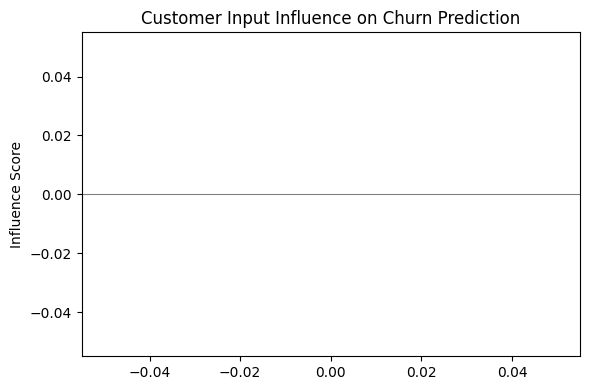

In [ ]:
# Cell 6 – Visualize Customer Input Impact
import matplotlib.pyplot as plt

# Define the 4 inputs used
input_labels = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SupportCalls']
# Create vals by grouping the input values
vals = [tenure, monthly, total, support]
input_values = dict(zip(input_labels, vals))  # from Cell 5
scaled_sample = scaler.transform([sample])[0]

# Get feature importance
importances = model.feature_importances_

# Get impact for just the 4 user-entered features
impact = {}
for i, name in enumerate(X.columns):
    if name in input_labels:
        impact[name] = scaled_sample[i] * importances[i]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(impact.keys(), impact.values(), color='skyblue')
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylabel("Influence Score")
plt.title("Customer Input Influence on Churn Prediction")
plt.tight_layout()
plt.show()